## When do we use ?

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable).


#### End of tail imputation is roughly equivalent to arbitrary value imputation, but it automatically selects the arbitrary values at the end of the variable distributions.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv', usecols=["Age","Fare","Survived"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<AxesSubplot:>

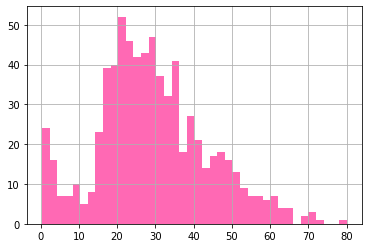

In [26]:
df.Age.hist(bins=40,color='hotpink')

In [8]:
extreme = df.Age.mean()+ 3*df.Age.std() # mean of 3rd standard deviation
extreme

73.27860964406095

<AxesSubplot:xlabel='Age'>

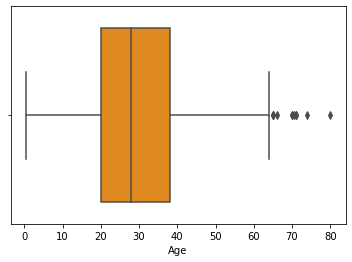

In [33]:
sns.boxplot(x='Age', data=df,color='darkorange' )

In [21]:
def impute_nan(df,variable,extreme):     #function to replace nan values with extreme
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)

In [22]:
impute_nan(df,"Age",extreme)

In [23]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


Text(0.5, 1.0, 'Age vs Age_end_distribution')

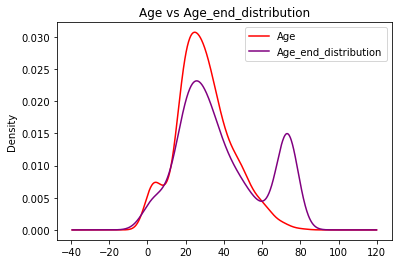

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df.Age_end_distribution.plot(kind='kde',ax=ax,color='purple')
ax.legend(loc='best')
plt.title('Age vs Age_end_distribution')

<AxesSubplot:>

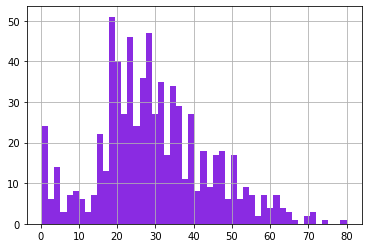

In [38]:
df['Age'].hist(bins=50,color= "blueviolet")

<AxesSubplot:>

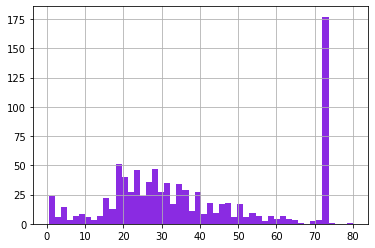

In [39]:
df['Age_end_distribution'].hist(bins=50,color= "blueviolet")